<a href="https://colab.research.google.com/github/Deborah-Minguez/03MAIR---Algoritmos-de-optimizacion--2020/blob/main/DeborahMinguezPorras_Seminario_OrganizarSesionesDoblaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos:  Deborah Minguez Porras <br>
URL: https://github.com/Deborah-Minguez/03MAIR---Algoritmos-de-optimizacion--2020/blob/main/DeborahMinguezPorras_Seminario_OrganizarSesionesDoblaje.ipynb <br>

Problema:
 1. Sesiones de doblaje <br>

(*) La respuesta es obligatoria


#Descripcion del Problema: <br>
Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio de grabación independientemente del número de tomas que se graben. No es posible grabar más de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que se gasto por los servicios de los actores de doblaje sea el menor posible. Los datos son: <br>

Número Actores: 10 <br>
Número de tomas: 30 <br>
Máximo tomas por día: 6 <br>
Actores/Tomas : //bit.ly/36D8IuK <br>

1 indica que el actor participa en la toma <br>
0 en caso contrario

# Preguntas:

### (*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



### ¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.

Respuesta

(*) Sin tener en cuenta las restricciones, y teniendo en cuenta que tenemos 30 tomas, tendriamos una unica posibilidad (todas las tomas el mismo día). <br>

En cambio, si tenemos en cuenta la restricción de que como máximo se pueden realizar 6 tomas en un día, tenemos las siguientes posibilidades: nos da una combinatoria de M=5 Y N= [30! / (6!*(30-6)!)]de posibilidades. Por tanto, el resultado final es M=5 y N= 593.775 que da el resultado de 6.150649533672229e+26 posibilidades.


### Modelo para el espacio de soluciones<br>
### (*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)

Respuesta

(*) La solución que mejor se me ha adaptado el problema ha sido para el total de datos (30 tomas Vs 10 actores) un dataframe de pandas, donde tenia los actores como variables y las tomas como registros. <br> 

Después, dada las soluciones propuestas en cada caso he utilizado un vector de 30 posiciones, donde cada posición era la toma exacta que se debía hacer. Ese vector lo que "troceado" en 5 partes en orden, donde cada trozo tenia las 6 tomas propuestas para un día. 

### Según el modelo para el espacio de soluciones
### (*)¿Cual es la función objetivo?

### (*)¿Es un problema de maximización o minimización?

Respuesta

(*) La función Objetivo es:  <br>
 - La suma del coste de los 5 días. He creado la función "calculo_coste_total" en python, donde le debo pasar por parámetro el vector de solución a valorar.  <br>
 - donde el coste diario se calcula como el número de actores distintos que tenemos en las 6 tomas que han sido seleccionadas para ese día. He creado la función "calculo_coste_dia" en código python, donde debo pasarle el vector de solución a valorar y exactamente en que día estoy de los 5 posibles. <br> 





(*) Es un problema de minimización del coste de los 5 días de rodaje necesarios para hacer las 30 tomas con los 10 actores de doblaje.

### Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

Como tenemos 6.150649533672229e+26 posibilidades en el problema, he descartado hacerlo por fuerza bruta. 

###Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

###(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

(*) He implementado un algoritmo de GRASP, donde inicio por la mejor solución aleatoria de 1000 ejecutadas, a partir de esa solución inicial trabajo con los vecinos mas cercanos, y a partir del mejor vecino inicio el proceso de nuevo analizando sus vecinos (realizo 200 iteraciones sobre los vecinos).

Creo que es mejor que la de fuerza bruta porque para poder acometerla debería ejecutar las 6.150649533672229e+26 de posibilidades que existen, y esto puede llegar a ser muchos días, incluso semanas. Con el algoritmo GRASP que he realizado, hago 1000 ejecuciones aleatorias iniciales, y de ese punto de partida 200 trabajando con vecinos más cercanos, obteniendo una solución buena y he tardado solo  25 minutos. No es la mejor seguramente, pero es un buen resultado (coste champion = 29 e incluso he conseguido un coste de 28).

In [4]:
# Librerias necesarias
import random
import pandas as pd
from google.colab import files

### Defino todas las funciones a continuación

In [5]:
# creamos una solucion aleatoria a partir de la lista de tomas 
# No Iniciamos a partir de la primera toma
def crear_solucion_aleat (tomas):
    solucion=[]
    for n in tomas[0:]:
        solucion=solucion + [random.choice(list(set(tomas)  - set (solucion)))]
    return solucion

In [6]:
# a partir del dia de la semana que es nos devuelve la posicion inicial y final del vector de soluciones (tomas)
def traduccion_dia (dia):
  if dia == 1:
    ini=1
  if dia == 2:
    ini=7
  if dia == 3:  
    ini=13
  if dia == 4:
    ini =19
  if dia == 5:
    ini =25
  fin = ini + 5
  return ini, fin

In [7]:
def calculo_coste_dia (solucion, dia):
  # a partir del día nos traemos la posicion ini y la posicion fin del vector de resultados
  ini, fin = traduccion_dia (dia)

  #inicializamos variables
  registros=[]
  N=ini
    
  #recorremos las posiciones para crear el subset (el dia de rodaje)
  while N < fin+1:
      registros.append(datos.loc[datos['Toma']==solucion[N-1]])
      N+=1
  subset = pd.concat(registros, axis=0)
  
  # calculamos el coste que tiene ese dia seleccionado
  coste_parcial=(subset['A1'].max(axis=0)+subset['A2'].max(axis=0)+subset['A3'].max(axis=0)+subset['A4'].max(axis=0)+subset['A5'].max(axis=0)
    + subset['A6'].max(axis=0)+subset['A7'].max(axis=0)+subset['A8'].max(axis=0)+subset['A9'].max(axis=0)+subset['A10'].max(axis=0))
                
  return coste_parcial

In [8]:
def calculo_coste_total (solucion):
    coste=(calculo_coste_dia (solucion,1) + calculo_coste_dia (solucion,2) + calculo_coste_dia (solucion,3) 
        + calculo_coste_dia (solucion,4) + calculo_coste_dia (solucion,5))
    return coste

In [9]:
def busqueda_aleatoria(tomas, N):
    mejor_solucion = []
    mejor_coste = 10e100
    
    # hacemos un bucle para iterar N veces
    for i in range(N):

        # Generamos  N soluciones aleatorias y calculamos su coste
        solucion = crear_solucion_aleat(tomas)                
        coste = calculo_coste_total (solucion) 

        # comparamos si la solucion aleatoria tiene mejor resultado que los anteriores
        if coste < mejor_coste:                 
            mejor_solucion = solucion
            mejor_coste = coste
            
    return mejor_solucion, mejor_coste 

In [10]:
# funcion extraida de la actividad guiada 3, que utilizare para calcular soluciones vecinas y medirlas
def genera_vecina(solucion, coste):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  mejor_solucion = solucion
  mejor_coste = coste
  for i in range(1,len(solucion)-1):    

    #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):
      
      #Se genera una nueva solución intercambiando los dos nodos i,j:
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]  

      #Se evalua la nueva solución 
      valor_vecina =  calculo_coste_total (vecina)         
        
      # y si es mejor se guarda como mejor resultado
      if valor_vecina < mejor_coste:
        mejor_coste = valor_vecina
        mejor_solucion = vecina

  return mejor_solucion, mejor_coste

In [11]:
def GRASP (tomas, N, M):

  # ejecuto una solucion aleatoria para obtener un  punto de partida, paso como parametro M que es el numero de aleatorias iniciales a lanzar 
  solucion_champion, coste_champion = busqueda_aleatoria(tomas,M)

  # hacemos un bucle para iterar N veces
  for i in range(N):
    solucion_vecina, coste_vecina = genera_vecina (solucion_champion, coste_champion)
    
    # y si es mejor la vecina se guarda como mejor resultado
    if coste_vecina < coste_champion:
      coste_champion = coste_vecina
      solucion_champion = solucion_vecina
  return solucion_champion, coste_champion

### Iniciamos el programa principal

In [13]:
#Importamos los datos del ejercicio
uploaded = files.upload()
datos = pd.read_csv('datos_problema.csv', header=0, sep = ';')

# cargo los id de las 30 tomas que tenemos
tomas=datos['Toma']

Saving datos_problema.csv to datos_problema.csv


In [ ]:
# Ejecuto el algoritmo de optimizacion GRASP, le paso por parametros las tomas que debemos optimizar, las N veces que quiero ejecutar el proceso 
# y las M veces que quiero que se genere las soluciones aleatorias iniciales (selecciona como punto de partida la mejor solucion aleatoria de las M ejecutadas)
# si pusiera N igual a 0 solo estaria haciendo las soluciones iniciales aleatorias, no estaría aplicando vecinos. En este caso concreto N=200 y M=1000

solucion_champion, coste_champion = GRASP (tomas, 200, 1000)

In [ ]:
# visualizo por pantalla la ganadora de la soluciones de vecinos
print(solucion_champion)
print(coste_champion)

[8, 5, 15, 4, 9, 21, 14, 17, 18, 23, 24, 19, 11, 27, 16, 22, 30, 25, 28, 6, 13, 2, 20, 7, 26, 10, 3, 29, 12, 1]
29


#### Otro resultado obtenido

Realicé otra prueba, que después no guarde, con los mismos parámetros que la ejecución que te presento (N=1000 aleatorio inicial y M=200 vecinos), y el resultado fue mejor 28. 

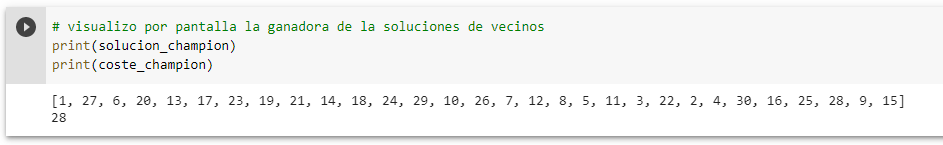

### (*)Calcula la complejidad del algoritmo

Respuesta

El algoritmo implementado a nivel de complejidad tiene: <br>
- Al ejecutar las 1000 (M) pruebas aleatorias: <br>
  1) 1000 llamadas a la funcion aleatoria, que a su vez tiene bucle del 1 al 29. <br> 
  2) Calculo coste, que llama 5 veces a la funcion coste por dia que a su vez hace bucle que va del A al A+5. <br>

- Se ejecutan 200 (N) combinaciones Vecinas, y cada una de ellas: <br>
  1) Realiza 406 propuestas de soluciones vecinas. <br>
  2) que a su vez para cada una de esas propuestas calcula el coste total llamando 5 veces al coste por dia, que a su vez tiene un bucle de A a A+5. <br>

COMPLEJIDAD: O( (200!)! + 1000 ) 

### Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta

He probado incluso a realizar una segmentación inicial K-means, con 11 segmentos (número de segmentos óptimo). Con esta segmentación pretendía agrupar tomas similares entre ellas y diferentes con el resto por la combinación (0/1) de los 10 actores. De esa forma tendría juntas tomas que salen mayoritariamente los mismos actores.

Después en lugar de tratar las tomas de forma individual, las trataba como packs (el segmento entero), y planteaba soluciones (aleatoria, vecina) a partir de los 11 segmentos, que después traducía a sus tomas reales en orden de aparición en el data set.

Un ejemplo sencillo para que se entienda de 5 tomas, donde se agrupan en tres segmentos: segmento 1 (toma 3 y 5), segmento 2 (toma 1 y 2) y segmento 3 (toma 4). En lugar de hacer aleatorio y vecinos con las tomas de la 1 a la 5, lo hago con los tres segmentos, por ejemplo me sale segmento 2, 1 y 3, y por tanto las tomas 1,2,3,5 y 4.

Este planteamiento de segmentación no ha mejorado la solución encontrada con las tomas de forma individual, por eso no la he implementado en google Colab (lo tengo en jupyter, que es como he trabajado las diferentes pruebas y escenarios hasta llegar a este definitivo que he implementado en google Colab).

Pongo a continuación los pantallazos donde muestro como seleccione 11 segmentos, hice la segmentación, y aplicaba las funciones de aleatorio a esa segmentación y vecinos.


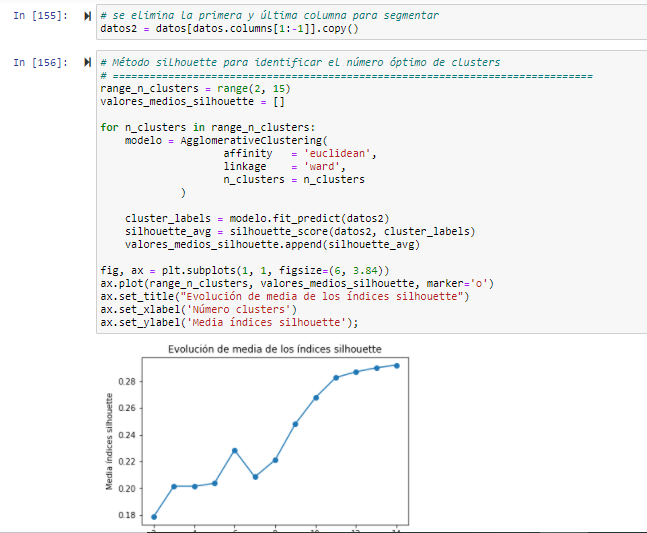

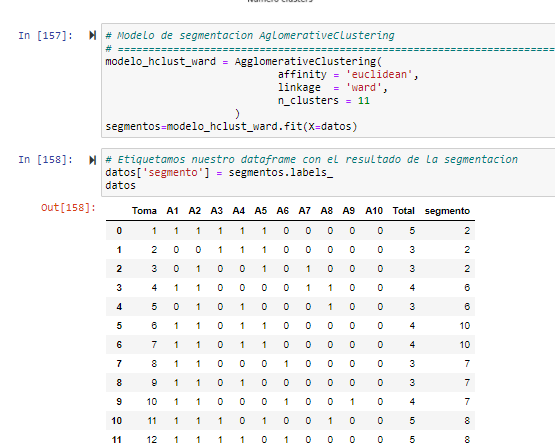

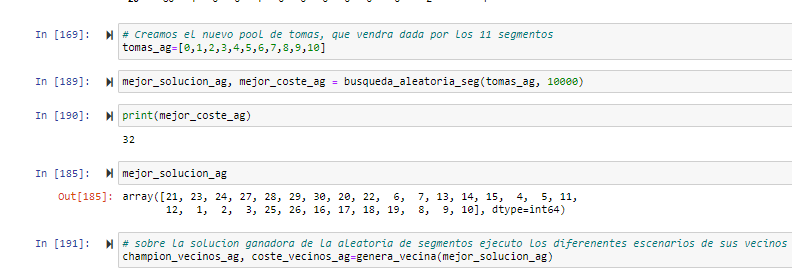